## Stage 1 - Data Understanding

### Objectives:

* Collect initial data √
* Fix Datatypes √
* Describe Data √
* Explore initial Data √
* Verify Data Quality √

In [1]:
# Load relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings


data = pd.read_csv("Accident_Data.csv")
pd.set_option('display.max_columns', None)

# To display multiple outputs from the same cell use the following codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change the width of the current notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Only display data in the designated borough
data = data[data['Local_Authority_Highway'] == 'E09000010']

In [3]:
#Fix the data types
#to obj
labelled_data = data
labelled_data[['1st_Road_Class', '1st_Road_Number','Speed_limit']] = labelled_data[['1st_Road_Class', '1st_Road_Number','Speed_limit']].astype(object)
labelled_data[['Location_Easting_OSGR','Location_Northing_OSGR', 'Police_Force', 'Accident_Severity']] = labelled_data[['Location_Easting_OSGR','Location_Northing_OSGR', 'Police_Force', 'Accident_Severity']].astype(str)
labelled_data[['Local_Authority_District', 'Road_Type', 'Junction_Detail', 'Junction_Control']] = labelled_data[['Local_Authority_District', 'Road_Type', 'Junction_Detail', 'Junction_Control']].astype(str)
labelled_data[['Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']] = labelled_data[['Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards']].astype(object)
labelled_data[['Local_Authority_District']] = labelled_data[['Local_Authority_District']].astype(str)
labelled_data[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']] = labelled_data[['Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']].astype(object)
labelled_data[['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident']] = labelled_data[['Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area','Did_Police_Officer_Attend_Scene_of_Accident']].astype(bool)

data = labelled_data
data[['Date']] = data[['Date']].astype('datetime64[ns]')
data['Time'] = pd.to_timedelta(data['Time'] + ':00')


data.dtypes
data.head()

Accident_Index                                          object
Location_Easting_OSGR                                   object
Location_Northing_OSGR                                  object
Longitude                                              float64
Latitude                                               float64
Police_Force                                            object
Accident_Severity                                       object
Number_of_Vehicles                                       int64
Number_of_Casualties                                     int64
Date                                            datetime64[ns]
Day_of_Week                                              int64
Time                                           timedelta64[ns]
Local_Authority_District                                object
Local_Authority_Highway                                 object
1st_Road_Class                                          object
1st_Road_Number                                        

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
6332,200501JC30048,535390,192070,-0.046077,51.611137,1,2,1,1,2005-01-17,2,0 days 11:23:00,32,E09000010,3,406,3,50,0,-1,-1,0,False,False,1,2,2,0,0,True,True,E01001559
16323,200501SX00050,528780,192610,-0.141286,51.617540,1,3,2,1,2005-01-14,6,0 days 18:30:00,32,E09000010,5,0,6,30,1,4,3,1003,False,True,4,1,1,0,0,True,True,E01001529
16351,200501SX00089,528930,194720,-0.138345,51.636467,1,3,2,1,2005-01-23,1,0 days 11:27:00,32,E09000010,3,111,6,30,6,2,4,1453,False,True,1,1,1,0,0,True,True,E01001519
16458,200501SX20099,528050,196210,-0.150509,51.650058,1,3,2,1,2005-10-02,5,0 days 06:05:00,32,E09000010,6,0,6,30,3,4,6,0,False,False,4,1,1,0,0,True,True,E01001415
16464,200501SX20106,528790,192490,-0.141186,51.616459,1,3,2,1,2005-09-03,4,0 days 08:51:00,32,E09000010,3,1003,1,30,1,4,3,1110,False,False,1,1,1,0,0,True,True,E01001529


## Describing Data
### Numeric Data Types
* Count
* Mean
* Min
* Max
* std
* 25%, 50% & 75%

### Categorical Data Types
* Count
* Unique
* Top
* Frequency

#### Sampleset of the Data
#### Datatypes

In [4]:
#Describe the data

print("Total number of rows and columns of the data:")
print(data.shape)

print("\nData Descriptions:")
data.describe()
data.describe(include='object')

print("Samples of the data:")
data.head()

print("Column Datatypes:")
data.info()

Total number of rows and columns of the data:
(4836, 32)

Data Descriptions:


,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,2nd_Road_Number
count,4836.000000,4836.000000,4836.000000,4836.000000,4836,4836.000000,4836,4836.000000
mean,-0.078949,51.639556,1.868486,1.290323,2007-11-23 17:29:01.935483904,4.114764,0 days 14:18:05.049627791,64.112696
min,-0.179093,51.606784,1.000000,1.000000,2005-01-01 00:00:00,1.000000,0 days 00:01:00,0.000000
25%,-0.103769,51.616445,1.000000,1.000000,2006-04-22 00:00:00,2.000000,0 days 10:20:00,0.000000
50%,-0.073571,51.635719,2.000000,1.000000,2007-10-14 12:00:00,4.000000,0 days 15:00:00,0.000000
75%,-0.051272,51.657132,2.000000,1.000000,2009-07-17 00:00:00,6.000000,0 days 18:20:00,0.000000
max,-0.014775,51.691639,10.000000,40.000000,2010-12-31 00:00:00,7.000000,0 days 23:59:00,1453.000000
std,0.033175,0.023301,0.680099,0.896320,NaN,1.946402,0 days 05:22:29.611895709,220.153405


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,LSOA_of_Accident_Location
count,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4836,4833
unique,4836,888,849,1,3,1,1,5,20,6,6,9,5,6,5,9,5,7,5,189
top,200501JC30048,530980,192090,1,3,32,E09000010,3,0,6,30,3,4,6,1,1,1,0,0,E01001412
freq,1,53,43,4836,4267,4836,4836,2858,1508,3540,3884,1762,2318,1779,3391,4155,3834,4772,4794,329


Samples of the data:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
6332,200501JC30048,535390,192070,-0.046077,51.611137,1,2,1,1,2005-01-17,2,0 days 11:23:00,32,E09000010,3,406,3,50,0,-1,-1,0,False,False,1,2,2,0,0,True,True,E01001559
16323,200501SX00050,528780,192610,-0.141286,51.617540,1,3,2,1,2005-01-14,6,0 days 18:30:00,32,E09000010,5,0,6,30,1,4,3,1003,False,True,4,1,1,0,0,True,True,E01001529
16351,200501SX00089,528930,194720,-0.138345,51.636467,1,3,2,1,2005-01-23,1,0 days 11:27:00,32,E09000010,3,111,6,30,6,2,4,1453,False,True,1,1,1,0,0,True,True,E01001519
16458,200501SX20099,528050,196210,-0.150509,51.650058,1,3,2,1,2005-10-02,5,0 days 06:05:00,32,E09000010,6,0,6,30,3,4,6,0,False,False,4,1,1,0,0,True,True,E01001415
16464,200501SX20106,528790,192490,-0.141186,51.616459,1,3,2,1,2005-09-03,4,0 days 08:51:00,32,E09000010,3,1003,1,30,1,4,3,1110,False,False,1,1,1,0,0,True,True,E01001529


Column Datatypes:
<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, 6332 to 143913
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   Accident_Index                               4836 non-null   object         
 1   Location_Easting_OSGR                        4836 non-null   object         
 2   Location_Northing_OSGR                       4836 non-null   object         
 3   Longitude                                    4836 non-null   float64        
 4   Latitude                                     4836 non-null   float64        
 5   Police_Force                                 4836 non-null   object         
 6   Accident_Severity                            4836 non-null   object         
 7   Number_of_Vehicles                           4836 non-null   int64          
 8   Number_of_Casualties                         4836 

The dataset has 7 Numeric variables:
The dataset has 20 Categorical variables:


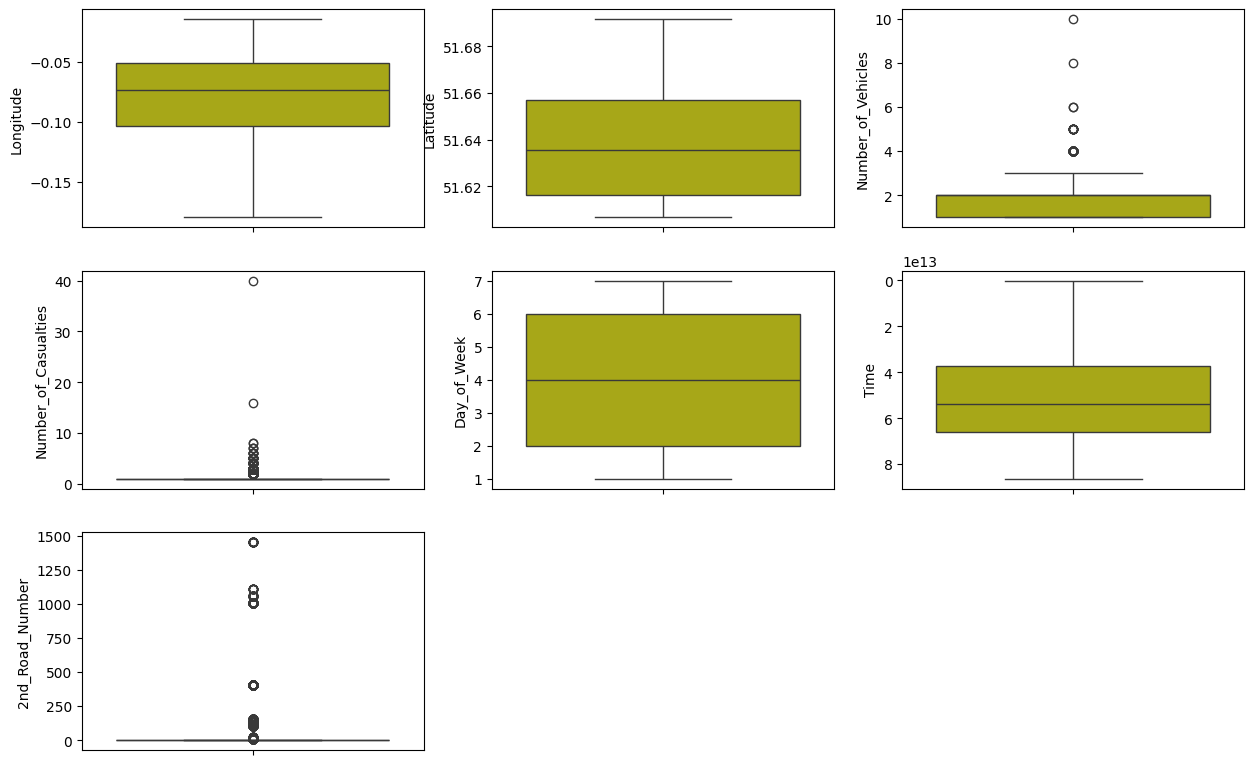

In [5]:
#making boxplots for the numeric data
# Select numeric variables
data_numeric = data.select_dtypes(include='number')
print('The dataset has', len(data_numeric.columns),'Numeric variables:')

# Select categorical variables
data_categorical = data.select_dtypes(include='object')
print('The dataset has', len(data_categorical.columns),'Categorical variables:')

# Use Boxplot to detect if outliers exist for numeric variables
fig = plt.figure(figsize= (15,30))

for i in range(len(data_numeric.columns)):
    column = data_numeric.columns[i]
    sub = fig.add_subplot(9,3,i+1)
    chart = sns.boxplot(data=data_numeric, y=column, color='y')


### BoxPlot Observation
* Skewness in Vehicle & Casualty count
* Longitude and Latitude could be better represented
* Time could be better represented

**A Scatterplot can be used to plot the accident location on a maplike graph** 

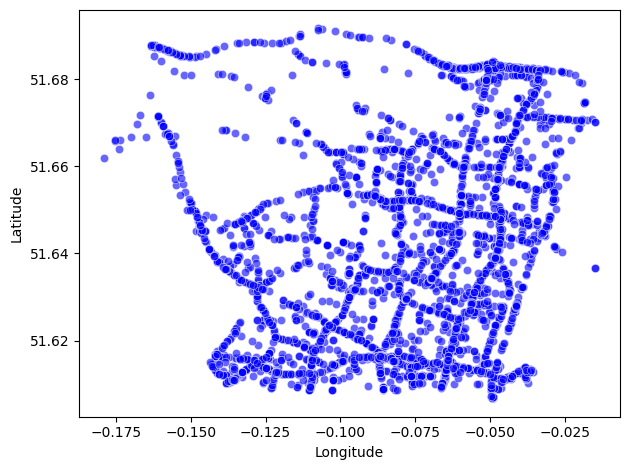

In [6]:
# Create scatter plot for Longitude & latitude
sns.scatterplot(data=data, x='Longitude', y='Latitude', alpha=0.6, color='blue')
plt.tight_layout()
plt.show();

**Scatterplots can also be used to show how accident rates vary throughout the day**

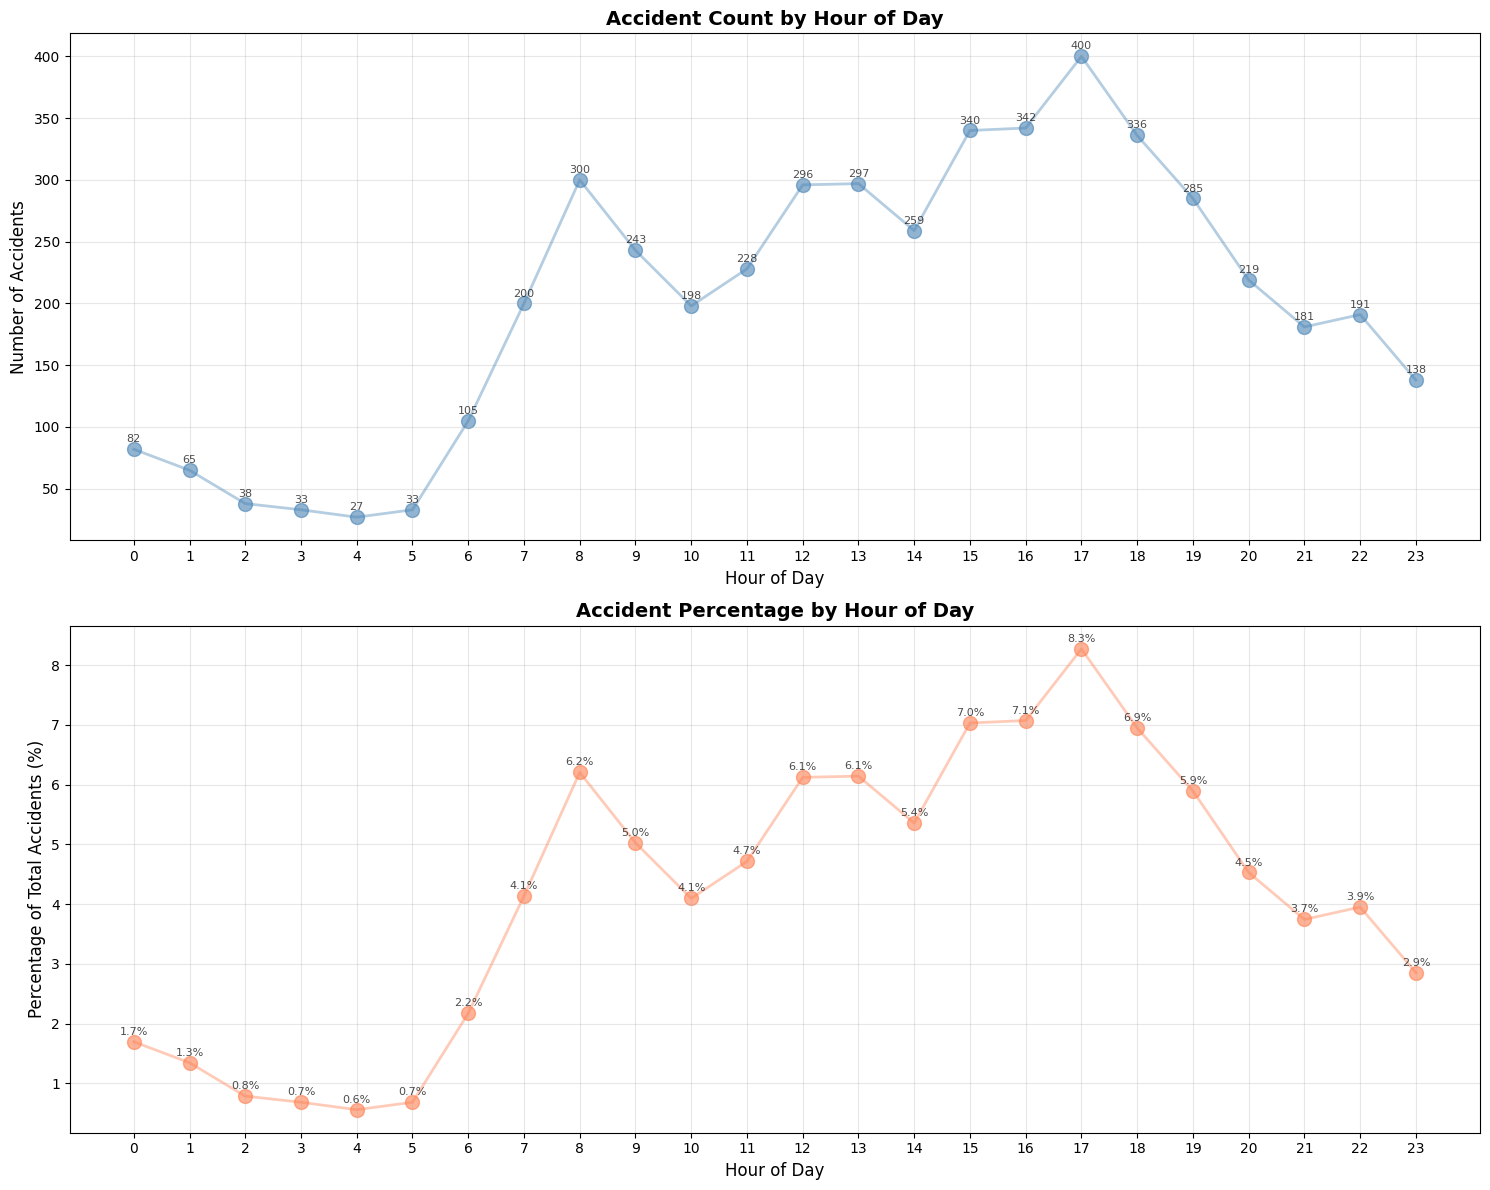

In [7]:
# Scatter plot for Time - hour by hour distribution (Count & Percentage)

# Create Hour column if it doesn't exist
if 'Hour' not in data.columns:
    data['Hour'] = data['Time'].dt.total_seconds() / 3600

# Calculate hour counts
hour_counts = data['Hour'].apply(lambda x: int(x)).value_counts().sort_index()

# Calculate percentages
total_accidents = len(data)
hour_percentages = (hour_counts / total_accidents) * 100

# Create figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# ============================================================================
# Plot 1: Accident Counts by Hour
# ============================================================================
axes[0].scatter(hour_counts.index, hour_counts.values, s=100, alpha=0.6, color='steelblue')
axes[0].plot(hour_counts.index, hour_counts.values, color='steelblue', alpha=0.4, linestyle='-', linewidth=2)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Number of Accidents', fontsize=12)
axes[0].set_title('Accident Count by Hour of Day', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, alpha=0.3)

# Add value labels on points
for hour, count in hour_counts.items():
    axes[0].annotate(f'{count}', 
                     xy=(hour, count), 
                     xytext=(0, 5), 
                     textcoords='offset points',
                     ha='center', 
                     fontsize=8, 
                     alpha=0.7)

# ============================================================================
# Plot 2: Accident Percentages by Hour
# ============================================================================
axes[1].scatter(hour_percentages.index, hour_percentages.values, s=100, alpha=0.6, color='coral')
axes[1].plot(hour_percentages.index, hour_percentages.values, color='coral', alpha=0.4, linestyle='-', linewidth=2)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Percentage of Total Accidents (%)', fontsize=12)
axes[1].set_title('Accident Percentage by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(0, 24))
axes[1].grid(True, alpha=0.3)

# Add percentage labels on points
for hour, pct in hour_percentages.items():
    axes[1].annotate(f'{pct:.1f}%', 
                     xy=(hour, pct), 
                     xytext=(0, 5), 
                     textcoords='offset points',
                     ha='center', 
                     fontsize=8, 
                     alpha=0.7)

plt.tight_layout()
plt.show();

## Categorical Data Observation

The histograms below show out categorical data

* Some columns only have 1 unique attribute
* Most of the columns have data skewed to 1 attribute

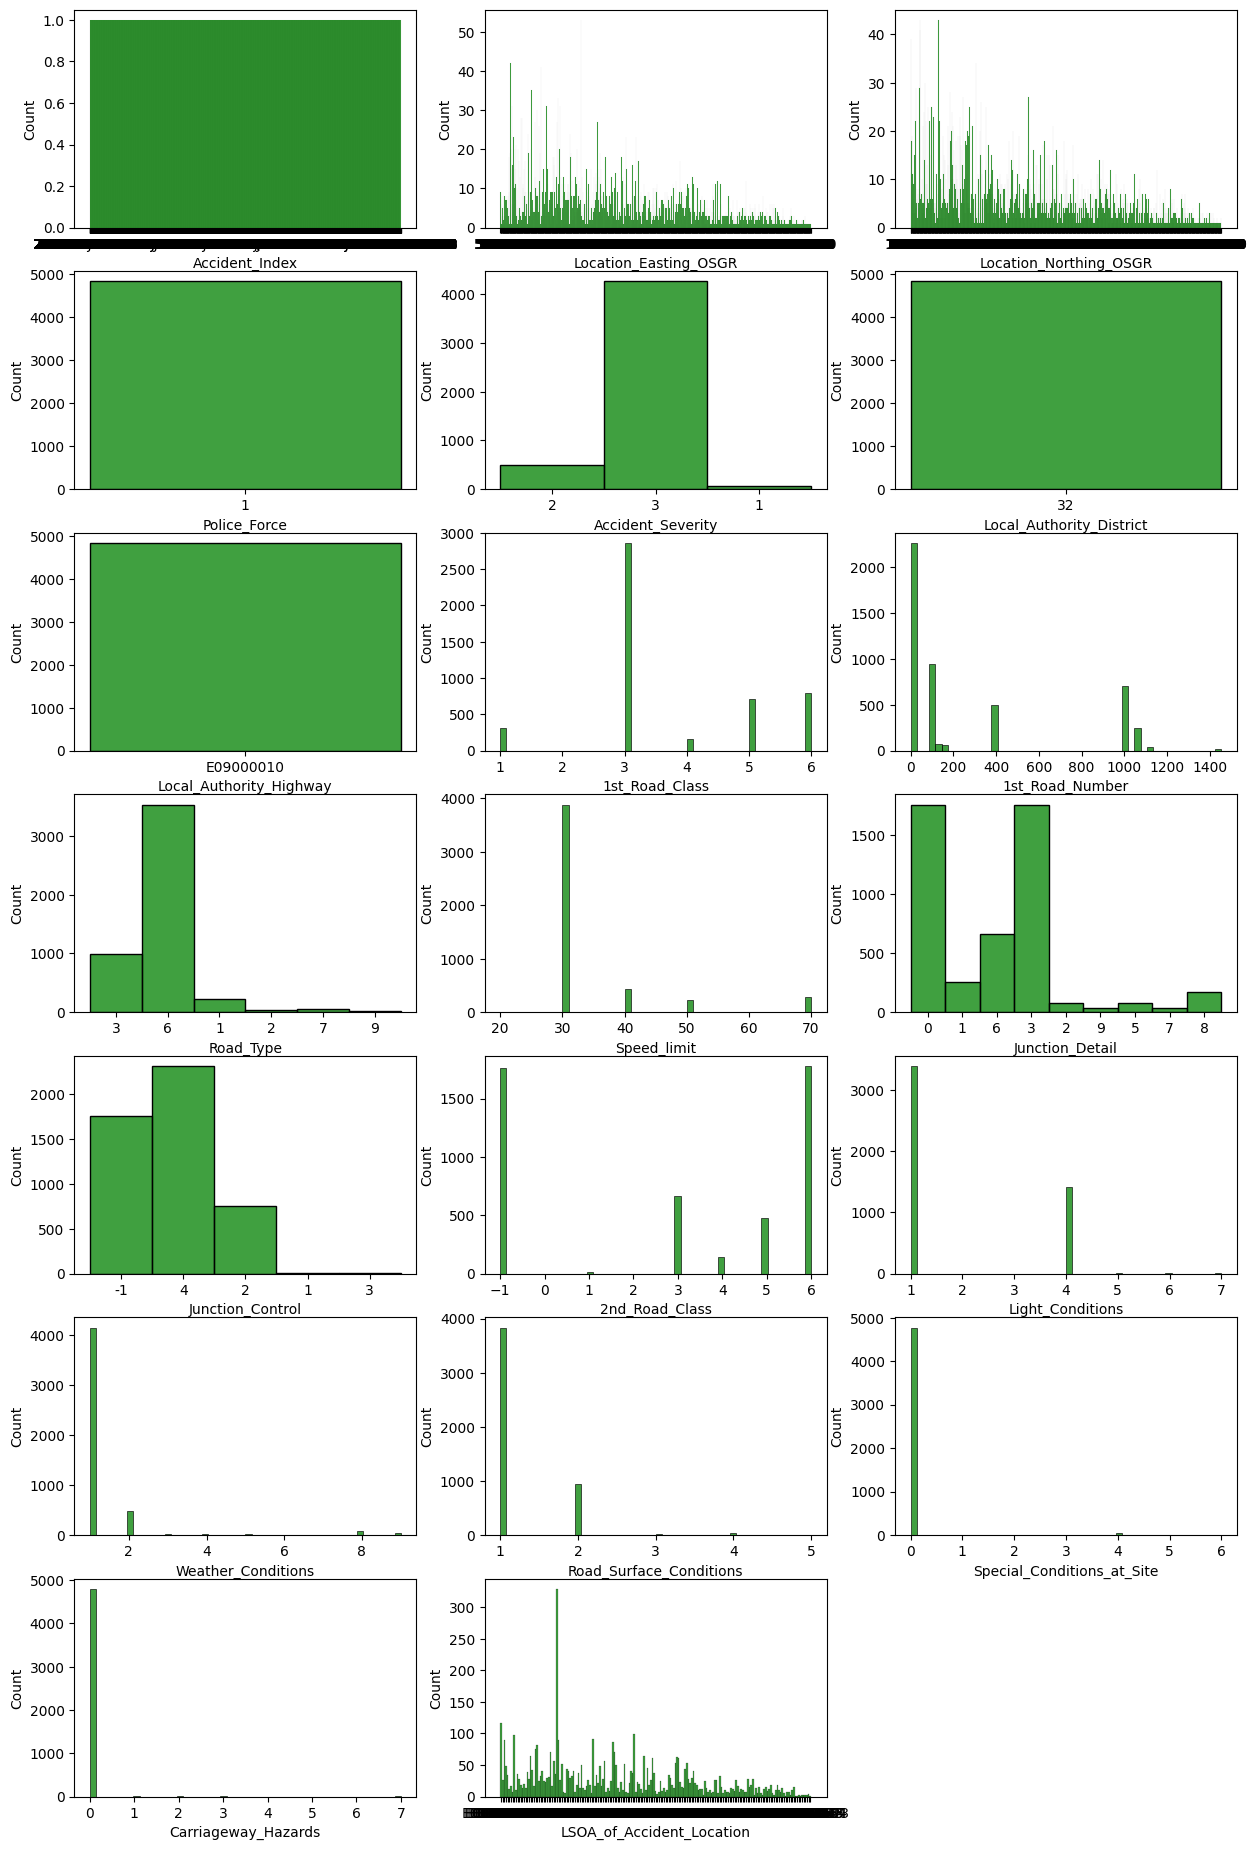

In [8]:
# Use histogram for all the categorical variables
fig = plt.figure(figsize= (15,30))

for i in range(len(data_categorical.columns)):
    column = data_categorical.columns[i]
    sub = fig.add_subplot(9,3, i+1)
    chart = sns.histplot(data=data_categorical, x=column, bins=50, color='g', kde=False)

## Stage 2 - Data Preperation

### Objectives

* Remove Unneeded data √
* Clean remaining Data (Fix Skewness, missing data) √
* Data Transformation
* Data Integration
* Formatting Data

**Columns with only 1 unique attribute can be dropped as they do no provide us with any information**

**If duplicate rows existed they would be dropped**

**Columns with over 30% of their rows having incompleate Data are dropped**

In [9]:
# Drop all categorical columns that only have 1 value 
data_categorical = data_categorical.loc[:, data_categorical.nunique() > 1]
data = data.loc[:, data.nunique() > 1]
data_categorical

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Accident_Severity,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,LSOA_of_Accident_Location
6332,200501JC30048,535390,192070,2,3,406,3,50,0,-1,-1,1,2,2,0,0,E01001559
16323,200501SX00050,528780,192610,3,5,0,6,30,1,4,3,4,1,1,0,0,E01001529
16351,200501SX00089,528930,194720,3,3,111,6,30,6,2,4,1,1,1,0,0,E01001519
16458,200501SX20099,528050,196210,3,6,0,6,30,3,4,6,4,1,1,0,0,E01001415
16464,200501SX20106,528790,192490,3,3,1003,1,30,1,4,3,1,1,1,0,0,E01001529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143206,201001YE89023,530800,192780,3,3,1004,6,30,3,4,6,4,1,1,0,0,E01001501
143207,201001YE89050,533870,192470,3,5,0,6,30,0,-1,-1,1,1,1,0,0,E01001425
143208,201001YE89083,535520,198390,3,3,1010,6,30,0,-1,-1,1,1,1,0,0,E01001549
143692,201001YR90602,535150,191630,3,3,1055,3,30,3,2,5,1,1,1,1,0,E01001559


In [10]:
# Check for duplicate rows (ignoring index)

# Find all duplicate rows
duplicates = data[data.duplicated(keep=False)]

print(f"Total number of duplicate rows: {len(duplicates)}")
print(f"Number of unique duplicate patterns: {data.duplicated().sum()}")
print(f"\nPercentage of duplicate rows: {(len(duplicates) / len(data) * 100):.2f}%")

if len(duplicates) > 0:
    print("\n" + "="*80)
    print("Duplicate Rows:")
    print("="*80)
    # Sort by all columns except index to group identical rows together
    duplicates_sorted = duplicates.sort_values(by=list(data.columns))
    display(duplicates_sorted)
else:
    print("\nNo duplicate rows found in the dataset.")

Total number of duplicate rows: 0
Number of unique duplicate patterns: 0

Percentage of duplicate rows: 0.00%

No duplicate rows found in the dataset.


In [11]:
# Identify and drop categorical columns containing -1 values

# Check which categorical columns contain -1
categorical_cols = data.select_dtypes(include='object').columns

print("=" * 60)
print("CHECKING CATEGORICAL COLUMNS FOR -1 VALUES")
print("=" * 60)

cols_with_neg1 = []
for col in categorical_cols:
    if '-1' in data[col].astype(str).values or -1 in data[col].values:
        count = (data[col].astype(str) == '-1').sum()
        print(f"{col:30s}: {count:4d} rows with -1")
        cols_with_neg1.append(col)

print("\n" + "=" * 60)
print(f"Columns to drop: {cols_with_neg1}")
print("=" * 60)

# Drop these columns
print(f"\nOriginal shape: {data.shape}")
data = data.drop(columns=cols_with_neg1)
print(f"New shape after dropping columns: {data.shape}")
print(f"\nColumns dropped: {', '.join(cols_with_neg1)}")

CHECKING CATEGORICAL COLUMNS FOR -1 VALUES
Junction_Control              : 1759 rows with -1
2nd_Road_Class                : 1759 rows with -1

Columns to drop: ['Junction_Control', '2nd_Road_Class']

Original shape: (4836, 28)
New shape after dropping columns: (4836, 26)

Columns dropped: Junction_Control, 2nd_Road_Class


# This section of the code works but takes 12 mins to run so is put into markdown form for now

print("="*50)
print("DUPLICATE & NEAR-DUPLICATE ANALYSIS")
print("="*50)

# 1. Exact duplicates
num_duplicates = data.duplicated().sum()
print(f"\n✓ Exact duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    duplicate_indices = data[data.duplicated(keep=False)].index.tolist()
    print(f"  Indices: {duplicate_indices}")

# 2. Near-duplicates (only for smaller DataFrames or subset)
if len(data) >= 1000:  # Limit for performance
    print("\n✓ Checking for near-duplicates (1 column different)...")
    
    near_dup_count = 0
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            diff_count = (data.iloc[i] != data.iloc[j]).sum()
            
            if diff_count == 2:
                near_dup_count += 1
                if near_dup_count <= 5:  # Show first 5
                    diff_col = data.columns[(data.iloc[i] != data.iloc[j])].tolist()[0]
                    print(f"  • Rows {i} & {j} differ in '{diff_col}': {data.iloc[i][diff_col]} vs {data.iloc[j][diff_col]}")
    
    if near_dup_count > 5:
        print(f"  ... and {near_dup_count - 5} more pairs")
    
    print(f"\n  Total near-duplicate pairs: {near_dup_count}")
else:
    print(f"\n⚠ DataFrame too large ({len(data)} rows) for near-duplicate check")
    print("  Consider checking a subset or specific columns")

print("\n" + "="*50)

Z Scoring used to identify any outliers for numeric Data, these rows have been removed.
Outliers could also be aggregated depending on business context

In [12]:
# Remove outliers based on Z-scores (|Z| > 3) for all numeric columns except 2nd_Road_Number

# Get only truly numeric columns (int64 and float64)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 2nd_Road_Number from outlier removal
cols_to_check = [col for col in numeric_cols if col != '2nd_Road_Number']

print("=" * 60)
print("REMOVING OUTLIERS (Z-score > 3)")
print("=" * 60)
print(f"\nOriginal dataset shape: {data.shape}")
print(f"\nColumns to check for outliers: {cols_to_check}")
print(f"Column excluded: 2nd_Road_Number")

# Calculate z-scores for columns to check
z_scores = data[cols_to_check].apply(zscore, nan_policy='omit')

# Find rows where ANY column has |z-score| > 3
outlier_mask = (abs(z_scores) > 3).any(axis=1)

# Count outliers per column before removal
print("\n" + "=" * 60)
print("OUTLIER COUNT BY COLUMN (before removal):")
print("=" * 60)
for col in cols_to_check:
    outlier_count = (abs(z_scores[col]) > 3).sum()
    print(f"{col:30s}: {outlier_count:4d} outliers")

# Remove outlier rows
data_cleaned = data[~outlier_mask].copy()

print("\n" + "=" * 60)
print("RESULTS:")
print("=" * 60)
print(f"Rows removed: {outlier_mask.sum()}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")
print(f"Percentage of data retained: {(len(data_cleaned) / len(data) * 100):.2f}%")

# Update the main data variable
data = data_cleaned

print("\nData has been updated. Outliers removed.")

REMOVING OUTLIERS (Z-score > 3)

Original dataset shape: (4836, 26)

Columns to check for outliers: ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Hour']
Column excluded: 2nd_Road_Number

OUTLIER COUNT BY COLUMN (before removal):
Longitude                     :    1 outliers
Latitude                      :    0 outliers
Number_of_Vehicles            :  111 outliers
Number_of_Casualties          :   90 outliers
Day_of_Week                   :    0 outliers
Hour                          :    0 outliers

RESULTS:
Rows removed: 189
Cleaned dataset shape: (4647, 26)
Percentage of data retained: 96.09%

Data has been updated. Outliers removed.


Categorical Data counted and removed/aggregated based on skewness percentage.

In [13]:
# Fix Categorical Data Skewness - All Remediation Steps

print("=" * 70)
print("CATEGORICAL DATA SKEWNESS REMEDIATION")
print("=" * 70)

# ============================================================================
# STEP 1: Drop Extremely Imbalanced Columns (>95% in one category)
# ============================================================================
print("\n[STEP 1] Dropping Extremely Imbalanced Columns (>95% skewness)")
print("-" * 70)

cols_to_drop = [
    'Special_Conditions_at_Site',      # 98.7% are "0"
    'Carriageway_Hazards'              # 99.1% are "0"
]

print(f"Original shape: {data.shape}")
for col in cols_to_drop:
    if col in data.columns:
        top_pct = (data[col].value_counts().iloc[0] / len(data)) * 100
        print(f"  Dropping {col:35s} - {top_pct:.1f}% in top category")

data = data.drop(columns=cols_to_drop)
print(f"New shape: {data.shape}\n")

# ============================================================================
# STEP 2: Binary Encode High Skewness Columns (85-95%)
# ============================================================================
print("[STEP 2] Binary Encoding High Skewness Columns (85-95%)")
print("-" * 70)

# Accident_Severity: "Severe" (1,2) vs "Slight" (3)
print("• Accident_Severity - Before:")
print(f"  {data['Accident_Severity'].value_counts().to_dict()}")
data['Accident_Severity_Binary'] = data['Accident_Severity'].apply(
    lambda x: 'Severe' if x in ['1', '2'] else 'Slight'
)
print("  After (Binary):")
print(f"  {data['Accident_Severity_Binary'].value_counts().to_dict()}")
data = data.drop(columns=['Accident_Severity'])

# Weather_Conditions: "Normal" (1) vs "Adverse" (others)
print("\n• Weather_Conditions - Before:")
print(f"  {data['Weather_Conditions'].value_counts().to_dict()}")
data['Weather_Binary'] = data['Weather_Conditions'].apply(
    lambda x: 'Normal' if x == 1 else 'Adverse'
)
print("  After (Binary):")
print(f"  {data['Weather_Binary'].value_counts().to_dict()}")
data = data.drop(columns=['Weather_Conditions'])

# ============================================================================
# STEP 3: Binary Encode Moderate-High Skewness Columns (70-85%)
# ============================================================================
print("\n[STEP 3] Binary Encoding Moderate Skewness Columns (70-85%)")
print("-" * 70)

# Road_Surface_Conditions: "Dry" (1) vs "Wet/Adverse" (others)
print("• Road_Surface_Conditions - Before:")
print(f"  {data['Road_Surface_Conditions'].value_counts().to_dict()}")
data['Road_Surface_Binary'] = data['Road_Surface_Conditions'].apply(
    lambda x: 'Dry' if x == 1 else 'Wet/Adverse'
)
print("  After (Binary):")
print(f"  {data['Road_Surface_Binary'].value_counts().to_dict()}")
data = data.drop(columns=['Road_Surface_Conditions'])

# Light_Conditions: "Daylight" (1) vs "Dark" (others)
print("\n• Light_Conditions - Before:")
print(f"  {data['Light_Conditions'].value_counts().to_dict()}")
data['Light_Binary'] = data['Light_Conditions'].apply(
    lambda x: 'Daylight' if x == 1 else 'Dark'
)
print("  After (Binary):")
print(f"  {data['Light_Binary'].value_counts().to_dict()}")
data = data.drop(columns=['Light_Conditions'])

# ============================================================================
# STEP 4: Group Categories for Moderate Skewness
# ============================================================================
print("\n[STEP 4] Grouping Categories for Moderate Skewness")
print("-" * 70)

# Speed_limit: Group into ranges
print("• Speed_limit - Before:")
print(f"  {data['Speed_limit'].value_counts().sort_index().to_dict()}")
data['Speed_Limit_Grouped'] = data['Speed_limit'].apply(
    lambda x: '30_or_less' if int(x) <= 30 else ('40-50' if int(x) <= 50 else '60_plus')
)
print("  After (Grouped):")
print(f"  {data['Speed_Limit_Grouped'].value_counts().to_dict()}")
data = data.drop(columns=['Speed_limit'])

# Road_Type: Group into major categories
print("\n• Road_Type - Before:")
print(f"  {data['Road_Type'].value_counts().to_dict()}")
data['Road_Type_Grouped'] = data['Road_Type'].apply(
    lambda x: 'Single_Carriageway' if x == '6' else ('Roundabout' if x == '3' else 'Other')
)
print("  After (Grouped):")
print(f"  {data['Road_Type_Grouped'].value_counts().to_dict()}")
data = data.drop(columns=['Road_Type'])

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("SUMMARY OF CHANGES")
print("=" * 70)
print(f"Final dataset shape: {data.shape}")
print(f"\nNew categorical columns created:")
print("  • Accident_Severity_Binary (Severe/Slight)")
print("  • Weather_Binary (Normal/Adverse)")
print("  • Road_Surface_Binary (Dry/Wet/Adverse)")
print("  • Light_Binary (Daylight/Dark)")
print("  • Speed_Limit_Grouped (30_or_less/40-50/60_plus)")
print("  • Road_Type_Grouped (Single_Carriageway/Roundabout/Other)")
print("\nSkewness remediation complete!")
print("=" * 70)

CATEGORICAL DATA SKEWNESS REMEDIATION

[STEP 1] Dropping Extremely Imbalanced Columns (>95% skewness)
----------------------------------------------------------------------
Original shape: (4647, 26)
  Dropping Special_Conditions_at_Site          - 98.7% in top category
  Dropping Carriageway_Hazards                 - 99.2% in top category
New shape: (4647, 24)

[STEP 2] Binary Encoding High Skewness Columns (85-95%)
----------------------------------------------------------------------
• Accident_Severity - Before:
  {'3': 4117, '2': 473, '1': 57}
  After (Binary):
  {'Slight': 4117, 'Severe': 530}

• Weather_Conditions - Before:
  {1: 3993, 2: 464, 8: 77, 9: 36, 3: 24, 5: 21, 4: 21, 7: 9, 6: 2}
  After (Binary):
  {'Normal': 3993, 'Adverse': 654}

[STEP 3] Binary Encoding Moderate Skewness Columns (70-85%)
----------------------------------------------------------------------
• Road_Surface_Conditions - Before:
  {1: 3696, 2: 891, 4: 46, 3: 13, 5: 1}
  After (Binary):
  {'Dry': 3696,

The dataset has 13 Categorical variables:


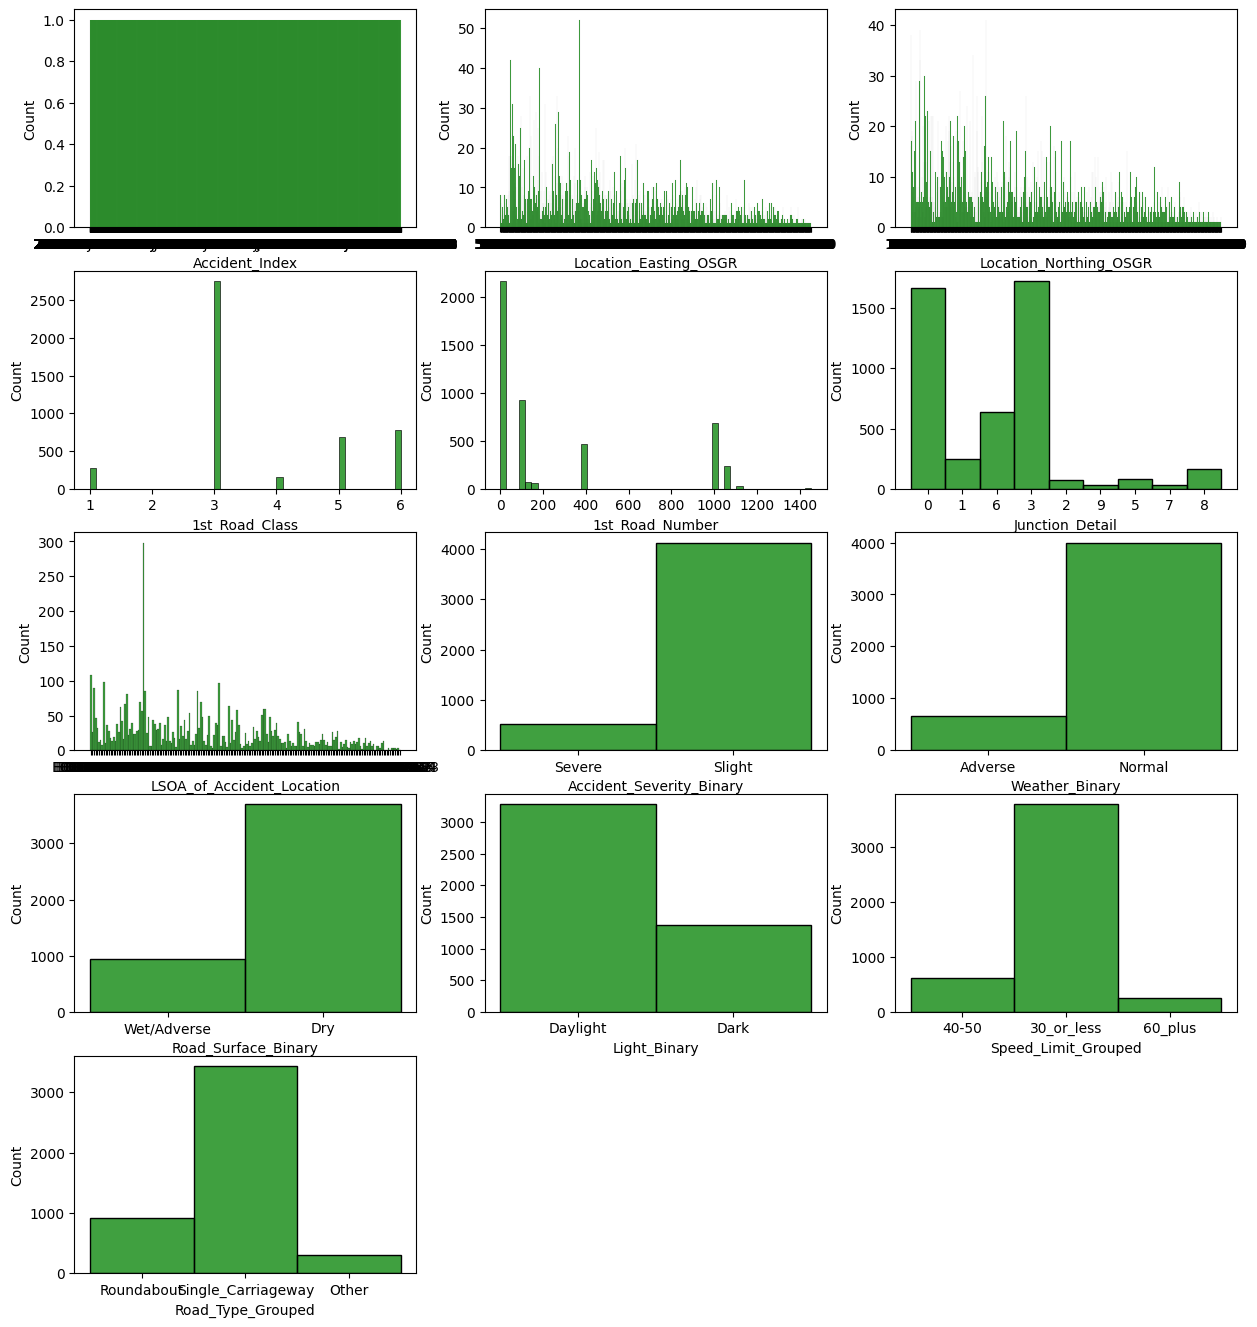

In [14]:
#Display categorical Changes
data_categorical = data.select_dtypes(include='object')
print('The dataset has', len(data_categorical.columns),'Categorical variables:')
# Use histogram for all the categorical variables
fig = plt.figure(figsize= (15,30))

for i in range(len(data_categorical.columns)):
    column = data_categorical.columns[i]
    sub = fig.add_subplot(9,3, i+1)
    chart = sns.histplot(data=data_categorical, x=column, bins=50, color='g', kde=False)

## Analysis of Data to determine clustering requirements

ACCIDENT SEVERITY vs SPEED LIMIT ANALYSIS
Error: One-hot encoded columns not found

Crosstab of Accident Severity vs Speed Limit:
Speed_Limit_Grouped       30_or_less  40-50  60_plus   All
Accident_Severity_Binary                                  
Severe                           413     79       38   530
Slight                          3360    533      224  4117
All                             3773    612      262  4647


Text(0.5, 1.0, 'Heatmap: Accident Severity vs Speed Limit (Counts)')

Text(0.5, 36.58159722222221, 'Speed Limit Group')

Text(0.5, 1.0, 'Heatmap: Accident Severity vs Speed Limit (% by Speed)')

Text(0.5, 36.58159722222221, 'Speed Limit Group')

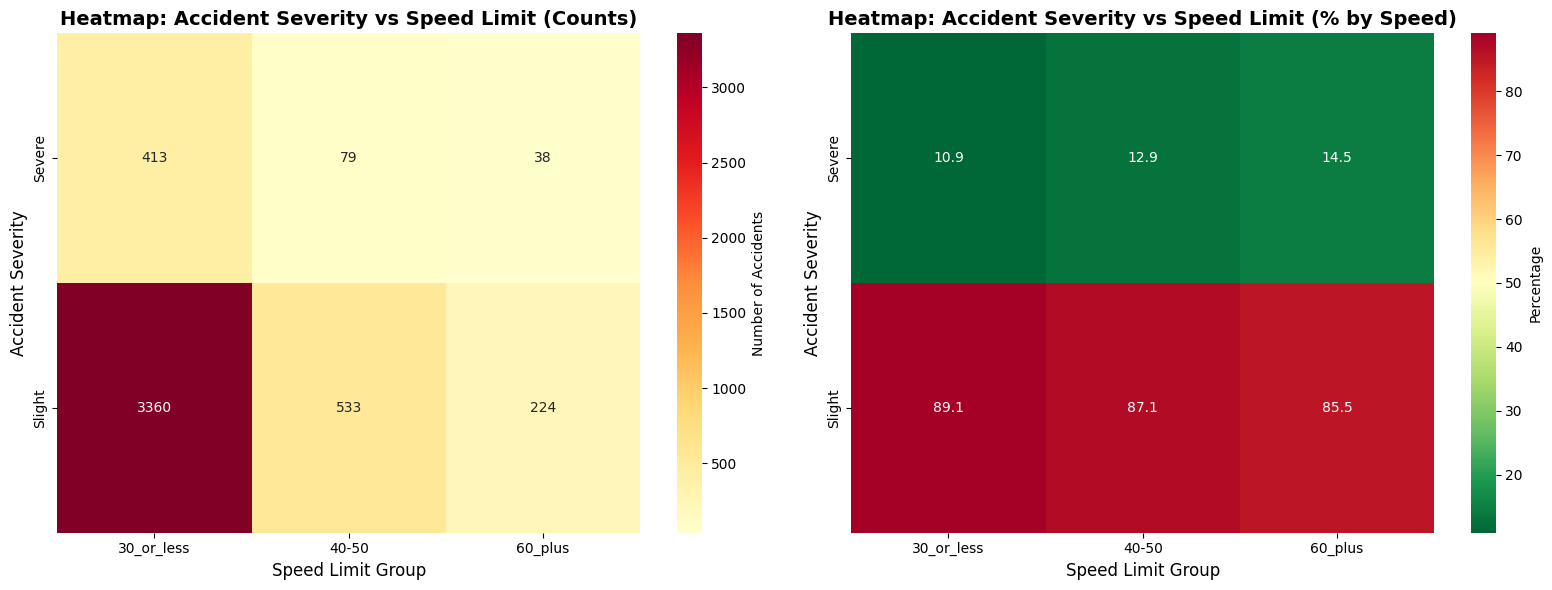


ANALYSIS SUMMARY

30_or_less:
  Total accidents: 3773
  Severe accidents: 413 (10.9%)
  Slight accidents: 3360 (89.1%)

40-50:
  Total accidents: 612
  Severe accidents: 79 (12.9%)
  Slight accidents: 533 (87.1%)

60_plus:
  Total accidents: 262
  Severe accidents: 38 (14.5%)
  Slight accidents: 224 (85.5%)



In [25]:
# Scatterplot & Heatmap: Accident Severity vs Speed Limit
# Using the one-hot encoded columns

print("=" * 70)
print("ACCIDENT SEVERITY vs SPEED LIMIT ANALYSIS")
print("=" * 70)

# Create a copy to work with
data_temp = data.copy()

# Recreate the original categorical columns from one-hot encoded data
# For Accident_Severity
if 'Accident_Severity_Binary_Severe' in data.columns:
    data_temp['Accident_Severity_Binary'] = data_temp['Accident_Severity_Binary_Severe'].apply(
        lambda x: 'Severe' if x == 1 else 'Slight'
    )
else:
    print("Error: One-hot encoded columns not found")

# For Speed_Limit_Grouped  
speed_cols = [col for col in data.columns if 'Speed_Limit_Grouped_' in col]
if speed_cols:
    for col in speed_cols:
        speed_group = col.replace('Speed_Limit_Grouped_', '')
        data_temp.loc[data[col] == 1, 'Speed_Limit_Grouped'] = speed_group

# Create a crosstab for heatmap
severity_speed_crosstab = pd.crosstab(
    data_temp['Accident_Severity_Binary'], 
    data_temp['Speed_Limit_Grouped'],
    margins=True
)

print("\nCrosstab of Accident Severity vs Speed Limit:")
print(severity_speed_crosstab)

# ============================================================================
# VISUALIZATION 1: Heatmap
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap showing counts
severity_speed_counts = pd.crosstab(
    data_temp['Accident_Severity_Binary'], 
    data_temp['Speed_Limit_Grouped']
)

_ = sns.heatmap(severity_speed_counts, annot=True, fmt='d', cmap='YlOrRd', 
                ax=axes[0], cbar_kws={'label': 'Number of Accidents'})
axes[0].set_title('Heatmap: Accident Severity vs Speed Limit (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Speed Limit Group', fontsize=12)
_ = axes[0].set_ylabel('Accident Severity', fontsize=12)

# Heatmap showing proportions
severity_speed_prop = pd.crosstab(
    data_temp['Accident_Severity_Binary'], 
    data_temp['Speed_Limit_Grouped'],
    normalize='columns'
) * 100

_ = sns.heatmap(severity_speed_prop, annot=True, fmt='.1f', cmap='RdYlGn_r', 
                ax=axes[1], cbar_kws={'label': 'Percentage'})
axes[1].set_title('Heatmap: Accident Severity vs Speed Limit (% by Speed)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Speed Limit Group', fontsize=12)
_ = axes[1].set_ylabel('Accident Severity', fontsize=12)

plt.tight_layout()
plt.show();

# ============================================================================
# ANALYSIS SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("ANALYSIS SUMMARY")
print("=" * 70)

for speed_group in ['30_or_less', '40-50', '60_plus']:
    if speed_group in data_temp['Speed_Limit_Grouped'].values:
        subset = data_temp[data_temp['Speed_Limit_Grouped'] == speed_group]
        severe_count = (subset['Accident_Severity_Binary'] == 'Severe').sum()
        total_count = len(subset)
        severe_pct = (severe_count / total_count * 100) if total_count > 0 else 0
        
        print(f"\n{speed_group}:")
        print(f"  Total accidents: {total_count}")
        print(f"  Severe accidents: {severe_count} ({severe_pct:.1f}%)")
        print(f"  Slight accidents: {total_count - severe_count} ({100-severe_pct:.1f}%)")

print("\n" + "=" * 70)